In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
police_complaints = pd.read_csv("PAC_Complaints_2009_2012.csv", sep=",", parse_dates = True, names= ["LON_X", "LAT_Y", "OBJECT_ID", "AGE", "RACE", "SEX", "TYPE", "DATE", "UNIT", "ACTION", "STATUS", "LONG", "LAT"])

In [5]:
del police_complaints["LON_X"]

In [6]:
del police_complaints["LAT_Y"]

Taking out the first two columns, originally marked as X and Y, as they seem to correspond to the latitude and longitude of a complaint, which are actually also the last two columns of the file.

In [7]:
police_complaints

,OBJECT_ID,AGE,RACE,SEX,TYPE,DATE,UNIT,ACTION,STATUS,LONG,LAT
0,OBJECTID_1,AGE,RACE,SEX,TYPE,DATE_,UNIT,ACTION,STATUS,LONG_,LAT
1,1,51,Black,Female,ABUSE OF AUTHORITY,2011/02/08 00:00:00+00,Airport,Reject,Closed,-75.229307,39.894728
2,2,45,Black,Male,ABUSE OF AUTHORITY,2011/05/25 00:00:00+00,Airport,Accept,Closed,-75.229307,39.894728
3,3,38,Black,Female,ABUSE OF AUTHORITY,2011/05/12 00:00:00+00,DET,Accept,Open,-75.23351,39.970535
4,4,33,Black,Female,NOT CLASSIFIED,2010/05/03 00:00:00+00,UNKNOWN,REJECT,Closed,-75.158592,39.950636
5,5,43,Black,Female,ABUSE OF AUTHORITY,2011/01/06 00:00:00+00,UNKNOWN,REJECT,Closed,-75.197687,40.015849
6,6,27,Black,Male,DRUG INVESTIGATIONS,2011/05/03 00:00:00+00,UNKNOWN,Reject,Closed,-75.160347,40.0657
7,7,49,Black,Male,LACK OF SERVICE,2011/05/24 00:00:00+00,UNKNOWN,Reject,Closed,-75.153429,40.031046
8,8,44,Hispanic,Female,PHYSICAL ABUSE,2011/07/15 00:00:00+00,UNKNOWN,Accept,Open,-75.128599,40.001902
9,9,35,Black,Female,POLICE SHOOTINGS,2011/08/10 00:00:00+00,UNKNOWN,Accept,Open,-75.116328,39.989788


In [8]:
sum(police_complaints["TYPE"] == "PHYSICAL ABUSE") 

129

I wanted to see how many complaints were about physical abuse. 129 complaints out of 455

In [9]:
sum(police_complaints["TYPE"] == "PHYSICAL ABUSE") / 455 * 100

28.35164835164835

So that's 28.35% of complaints against police were about physical abuse

In [10]:
physical_abuse = police_complaints[police_complaints["TYPE"] == "PHYSICAL ABUSE"]

In [11]:
long = physical_abuse["LONG"].replace({r'\\r': ''}, regex=True)

In [12]:
lat = physical_abuse["LAT"].replace({r'\\r': ''}, regex=True)

In [13]:
plt.scatter(pd.to_numeric(long), pd.to_numeric(lat), color="red")

In [14]:
plt.title("Complaints of Physical Abuse by Police across Philadelphia")

In [15]:
plt.xlabel("Longitude")

In [16]:
plt.ylabel("Latitude")

In [17]:
city_hall_lon = -75.163894
city_hall_lat = 39.952247
plt.plot(pd.to_numeric(city_hall_lon), pd.to_numeric(city_hall_lat), 'bd', markersize=12)

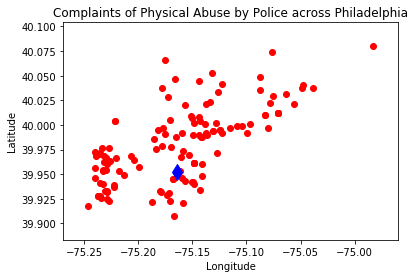

In [18]:
plt.show()

For my first successful plotting of data from this set, I looked at complaints filed against police for physical abuse, plotted by latitude and longitude and marked in red dots. I dropped a blue diamond to show City Hall, which is considered the city center, though the city actually extends farther north and east than it does south. The highest largest concentration of these complaints were in West Phladephia, roughly starting in the Mantua neighborhood and west into Overbrook. The next largest pocket, to the nother and east of City Hall, roughly corresponds to Frankford and Kensington neighborhoods in Philadelphia's Northeast. Both are on the lower end of the socieconomic bracket, and roughly speaking, the West Philly neighborhoods are predmoninately minorities, and the Northeast area is mostly white. Notably, the absence of complaints to the west of City Hall roughly corresponds to Center City West, which is more office buildings and skyscrapers; the Art Museum, Schuylkill riverside and their surounding neighborhoods; and University City in West Philadelphia, where Drexel and University of Pennsylvania are.

In [19]:
plt.clf()

In [20]:
male_long = [long[police_complaints["SEX"] == "Male"]]

In [21]:
male_lat = [lat[police_complaints["SEX"] == "Male"]]

In [22]:
female_long = [long[police_complaints["SEX"] == "Female"]]

In [23]:
female_lat = [lat[police_complaints["SEX"] == "Female"]]

In [24]:
fig, ax = plt.subplots()

In [25]:
plt.scatter(male_long, male_lat, color="blue")

In [26]:
plt.scatter(female_long, female_lat, color="green")

In [27]:
plt.xlabel("Longitude")

In [28]:
plt.ylabel("Latitude")

In [29]:
city_hall_lon = -75.163894
city_hall_lat = 39.952247
plt.plot(pd.to_numeric(city_hall_lon), pd.to_numeric(city_hall_lat), 'rd', markersize=12)

In [30]:
plt.title("Police Physical Abuse Complaints by Sex")

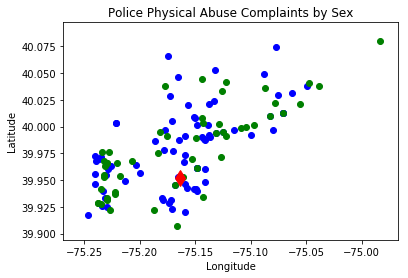

In [31]:
plt.show()

In [32]:
len(long[police_complaints["SEX"] == "Male"])

76

In [33]:
len(long[police_complaints["SEX"] == "Female"])

53

I thought I'd try to break down the complaints by the sex of the complainant. It doesn't yield that much more interesting information; on the numbers which don't visualize all that well, men filed complaints against police for physical abuse 50 percent more than women did. The graph does visualize well that the larger concentrations of women who filed such complaints were in the same areas as men. However, one notable concentration of female complaints is on a slightly diagonal line, starting from about -75.15, 39.90 and to the east; this is also roughly the Kensington area and could be below the elevated train; the area in general has long been known for heroin and prostitution, especially under the El train tracks, so it's possible to infer that these complaints could have been filed by sex workers.

In [34]:
plt.clf()

In [35]:
POC = physical_abuse[physical_abuse["RACE"] != "White"]

In [36]:
white = physical_abuse[physical_abuse["RACE"] == "White"]

In [37]:
len(white)

14

In [38]:
len(POC)

115

In [39]:
POC_long = [long[police_complaints["RACE"] != "White"]]

In [40]:
POC_lat = [lat[police_complaints["RACE"] != "White"]]

In [41]:
white_long = [long[police_complaints["RACE"] == "White"]]

In [42]:
white_lat = [lat[police_complaints["RACE"] == "White"]]

In [43]:
fig, ax = plt.subplots()

In [44]:
plt.scatter(POC_long, POC_lat, color="blue")

In [45]:
plt.scatter(white_long, white_lat, color="green")

In [46]:
city_hall_lon = -75.163894
city_hall_lat = 39.952247
plt.plot(pd.to_numeric(city_hall_lon), pd.to_numeric(city_hall_lat), 'rd', markersize=12)

In [47]:
plt.title("Police Physical Abuse Complaints by Race")

In [48]:
plt.xlabel("Longitude")

In [49]:
plt.ylabel("Latitude")

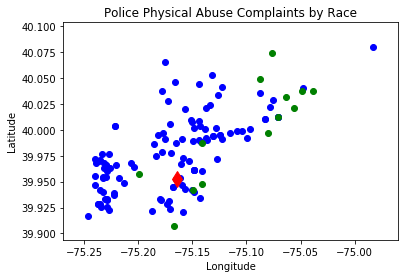

In [50]:
plt.show()

Breaking the same bit of data by race, or rather, white and non-white, shows very few complaints filed by white people. I chose to split it binary this way because the city is roughly 45% white and 44% black, according to the [2010 US Census](https://www.census.gov/quickfacts/table/RHI125215/4260000,00) The largest concentration of complaints by whites are in the far Northeast, which is mostly white. The next cluster of complaints by whites are in South Philadelphia east of City Hall, which is roughly an area known for Italian neighborhoods and working-class whites (not necessarily the same neighborhoods). Nonwhites, however, basically filed complaints against police for physical abuse all over the city. 